<a href="https://colab.research.google.com/github/KOHAKUDEUS/Fundamental-ML/blob/main/ML_%7C_Kaggle_Breast_Cancer_Wisconsin_Diagnosis_using_KNN_and_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
file_path = '/content/drive/MyDrive/100+ Machine Learning Projects with Source Code [2024]/Healthcare/Data for healthcare/ML  Kaggle Breast Cancer Wisconsin Diagnosis.csv'
import pandas as pd
df = pd.read_csv(file_path)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
#checking unbalance output
class_percent = df['diagnosis'].value_counts(normalize = True)*100
print(class_percent)

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [41]:
df = df.drop(['Unnamed: 32'], axis = 1)

In [42]:
df = df.drop(['id'], axis = 1)

In [43]:
df.head()
print(df.shape)

(569, 31)


In [44]:

def diagnosis_value(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
    return 0
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)



In [45]:
print(df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [46]:
import numpy as np
X = np.array(df.iloc[:, 1:])
#Nomalization in KNN:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = np.array(df['diagnosis'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 42)

In [47]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [49]:
knn.score(X_test, y_test)

0.9627659574468085

In [50]:
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
for k in range(1, 51, 2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
  cv_scores.append(scores.mean())
print(cv_scores)

[0.9502024291497977, 0.9553981106612686, 0.9684885290148447, 0.9684885290148447, 0.9684885290148447, 0.9632253711201079, 0.968421052631579, 0.9657894736842106, 0.9631578947368421, 0.963157894736842, 0.963157894736842, 0.9657894736842104, 0.963157894736842, 0.9605263157894737, 0.9579622132253711, 0.9553306342780028, 0.9579622132253711, 0.9553306342780026, 0.9526990553306343, 0.9526990553306343, 0.9500674763832657, 0.9474358974358974, 0.944804318488529, 0.944804318488529, 0.9474358974358973]


The optimal number of neighbors is 5


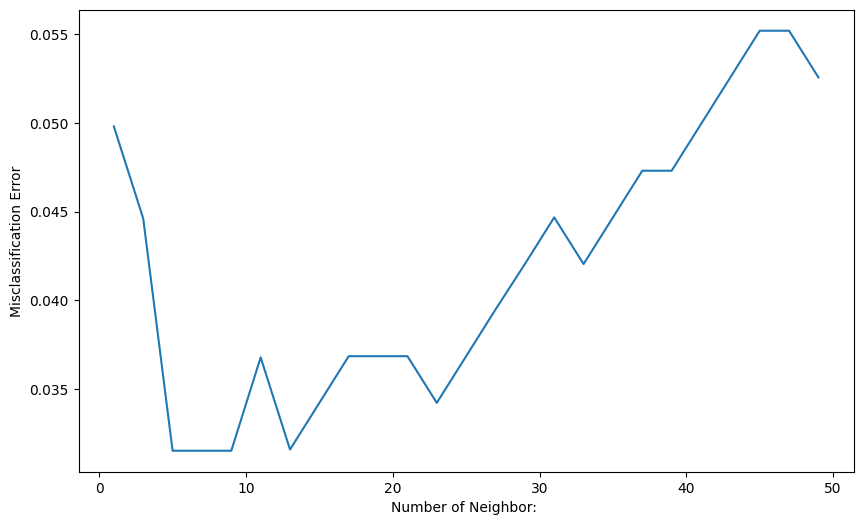

In [51]:
MSE = [ 1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k)

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbor: ')
plt.ylabel('Misclassification Error')
plt.show()